<a href="https://colab.research.google.com/github/scudilio/classification_metrics/blob/master/m%C3%A9tricas_modelo_classifica%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**KNN para Classificação**

##**Importando as bibliotecas necessárias**




In [66]:
import pandas as pd #manipulação de dataset
from sklearn.preprocessing import LabelEncoder #pré-processamento
from sklearn.preprocessing import MinMaxScaler #padronização
from sklearn.neighbors import KNeighborsClassifier #classificador
from sklearn.model_selection import train_test_split #separando em dados teste e treinamento 
from sklearn.metrics import classification_report # metricas de validação
from sklearn.metrics import accuracy_score #acuracia
from sklearn.metrics import precision_score #precision
from sklearn.metrics import recall_score #recall
from sklearn.metrics import f1_score #f1-score
from sklearn.metrics import roc_auc_score #area sob curva roc
from sklearn.metrics import roc_curve #curva roc
from sklearn.metrics import confusion_matrix #matriz de confusão
from matplotlib import pyplot #grafico



##**Importando o conjunto de dados do Github**

In [7]:
url = 'https://raw.githubusercontent.com/scudilio/classification_metrics/master/dataset_Social_Network_Ads.csv'
data = pd.read_csv(url)
data.head(5)


User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0

#**Porcentagem de clientes que compraram o anúncio**

Podemos perceber que apenas 35% dos clientes compraram o anúncio.

In [47]:
data['Purchased'].sum()/data['Purchased'].count()

0.3575

##**Separando a variável dependente das variáveis independentes**

Para exemplificar e simplificar o problema iremos utilizar apenas as variáveis numéricas.

In [21]:
#Criando variaveis independentes e dependentes
#utilizaremos apenas as variáveis numéricas

y = data['Purchased']
X = data.iloc[ :, [2,3]].values

##**Pré-Processamento Básico Padronizando as Variáveis Contínuas** 



In [26]:
X = MinMaxScaler().fit_transform(X)

##**Separando o dados em Treino e Teste**

In [31]:
x_treino, x_teste, y_treino,y_teste  = train_test_split(X, y, test_size = 0.25,random_state = 1)

#**Ajustando o KNN nos dados de Treino**

In [32]:
knn = KNeighborsClassifier()
knn.fit(x_treino, y_treino)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

# AVALIAÇÃO DE PERFORMANCE DE MODELOS

#### Matriz de Confusão:

<img src= 'Assets/matriz_confusao_01.jpg'>

##### As seguintes características associadas aos testes diagnostico são bastante utilizadas na pratica. 

<b>Sensibilidade VP/(VP+FN)</b> : corresponde proporção ou probabilidade de resultado positivo para pacientes doentes [S = P(T + |D)] e pode ser estimada pors = n11/n1+;ii)

<b>Especificidade VN/(VN+FP):</b> corresponde `a probabilidade de resultado negativo para pacientes não doentes [E = P(T − |ND)] e pode ser estimada por e = n22/n2+;iii) 

<b>FP - Falso positivo (erro do tipo I):</b> erro em que o modelo previu a classe Positivo quando valor real era a classe  Negativo. corresponde `a probabilidade de resultado positivo para pacientes não doentes [F P = P(T + |ND)] e pode ser estimada por f p = n21/n2+;iv) 

<b>FN - Falso negativo (erro do tipo II):</b> erro em que o modelo previu a classe Negativo quando na verdade era a classe positivo; corresponde `a probabilidade de resultado negativo para pacientes doentes [F N = P(T − |D)] e pode ser estimada por fn = n12/n1+;v) 

<b>VP - Valor preditivo positivo:</b> classificação correta da classe Positivo. corresponde `a probabilidade de que o paciente seja doente dado que o resultado do teste ´e positivo [V P P =P(D|T+)] e pode ser estimada por vpp = n11/n+1;vi) 

<b>VN - Valor preditivo negativo:</b> classificação correta da classe Negativo. corresponde `a probabilidade de que o paciente não seja doente dado que o resultado do teste ´e negativo[V P N = P(ND|T−)] e pode ser estimada por vpn = n22/n+2;vii)

<b>Acurácia:</b> corresponde `a probabilidade de resultados corretos [AC =P{(D∩T+)∪(ND∩T−)}] e pode ser estimada por ac = (n11+n22)/n.
A Acurácia é a média global do acerto do modelo ao classificar as classes, pode ser calculada através da razão (VN+VP)/(VP+FN+VN+FP).


<img src='Assets/metricas_01.jpg'>


Acurácia: indica uma performance geral do modelo. Dentre todas as classificações, quantas o modelo classificou corretamente;
Precisão: dentre todas as classificações de classe Positivo que o modelo fez, quantas estão corretas;
Recall/Revocação/Sensibilidade: dentre todas as situações de classe Positivo como valor esperado, quantas estão corretas;
F1-Score: média harmônica entre precisão e recall

A precisão pode ser usada em uma situação em que os Falsos Positivos são considerados mais prejudiciais que os Falsos Negativos. Por exemplo, ao classificar uma ação como um bom investimento, é necessário que o modelo esteja correto, mesmo que acabe classificando bons investimentos como maus investimentos (situação de Falso Negativo) no processo. Ou seja, o modelo deve ser preciso em suas classificações, pois a partir do momento que consideramos um investimento bom quando na verdade ele não é, uma grande perda de dinheiro pode acontecer.

O recall pode ser usada em uma situação em que os Falsos Negativos são considerados mais prejudiciais que os Falsos Positivos. Por exemplo, o modelo deve de qualquer maneira encontrar todos os pacientes doentes, mesmo que classifique alguns saudáveis como doentes (situação de Falso Positivo) no processo. Ou seja, o modelo deve ter alto recall, pois classificar pacientes doentes como saudáveis pode ser uma tragédia.

A sensibilidade de um teste corresponde `a proporção de doentes identificados por seu intermédio, ou seja, ´e um indicativo da capacidade de o teste detectar a doença. Por outro lado, a especificidade de um teste corresponde a sua capacidade de identificar indivíduos que não tem a doença. Quanto maior a sensibilidade de um teste, menor ´e a possibilidade de que indique falsos positivos. Um teste com sensibilidade de 95%, por exemplo, consegue identificar um grande número de pacientes que realmente tem a doença e por esse motivo testes com alta sensibilidade são utilizados em triagens. Quanto maior a especificidade de um teste, maior ´e a probabilidade de apresentar um resultado negativo para pacientes que não tem a doença, por exemplo, a especificidade de um teste for de 99% dificilmente um paciente que não tem a doença terá um resultado positivo. Um bom teste é aquele que apresenta alta sensibilidade e alta especificidade, mas nem sempre isso é possível valor preditivo positivo indica a probabilidade de um indivíduo ter doença dado que o resultado do teste ´e positivo e o valor preditivo negativo indica a probabilidade de um indivíduo não ter a doença dado um resultado negativo no teste. Sensibilidade e especificidade são características do teste, mas tanto o valor preditivo positivo quanto o valor preditivo negativo dependem da prevalência (porcentagem de indivíduos doentes na população) da doença.



##**Calculando a Matriz de Confusão nos dados de Teste**

In [33]:
#Calculando a matriz de confusão
resultado_knn = knn.predict(x_teste)
print (pd.crosstab(y_teste,resultado_knn, rownames=['Real'], colnames=['Predito'], margins=True))

Predito   0   1  All
Real                
0        50   8   58
1         4  38   42
All      54  46  100


##**Calculando as métricas de validação**

* **Acurácia**

Acurácia corresponde `a probabilidade de resultados corretos [AC =P{(D∩T+)∪(ND∩T−)}] e pode ser estimada por ac = (n11+n22)/n.
A Acurácia é a média global do acerto do modelo ao classificar as classes, pode ser calculada através da razão (VN+VP)/(VP+FN+VN+FP).

In [38]:
# Acurácia
acuracia = accuracy_score(y_teste, resultado_knn)
print('Acurácia: %f' % acuracia)

Acurácia: 0.880000


In [48]:
50/58

0.8620689655172413

* **Precision**

Precision a métrica que traz a informação de quantas observações o modelo classificou corretamente como 1. Ou seja, de todas os clientes que o modelo previu como comprador, quantos realmente fizeram a compra# Precision
precision = precision_score(y_teste, resultado_knn)
print('Precision: %f' % precision)

In [39]:
#precision
precision = precision_score(y_teste, resultado_knn)
print('Precision: %f' % precision)

Precision: 0.826087


* **Recall**

Recall analisa entre todos os compradores, quantos realmente o modelo conseguiu prever como comprador.
Obtemos um Recall de 90%, ou seja, de todos os compradores o modelo conseguiu classificar corretamente 90% dos compradores.
Observe que a Recall e a Precision traz informações sobre a qualidade do modelo em estimar a classe de interesse

In [40]:
# Recall
recall = recall_score(y_teste, resultado_knn)
print('Recall: %f' % recall)


Recall: 0.904762


* **F1-Score**

A F1-Score é a média harmônica entre o Recall e Precision, ou seja, ela resume as informações dessas duas métricas.

In [42]:
# F1-Score
f1 = f1_score(y_teste, resultado_knn)
print('F1-Score: %f' % f1)

F1-Score: 0.863636


* **Analisando as métricas de acordo com as classes**

In [44]:
print(classification_report(y_teste, resultado_knn))

              precision    recall  f1-score   support

           0       0.93      0.86      0.89        58
           1       0.83      0.90      0.86        42

    accuracy                           0.88       100
   macro avg       0.88      0.88      0.88       100
weighted avg       0.88      0.88      0.88       100



* **Área Sob a Curva Roc - AUC**

A área sob a curva Roc traz a informação sobre a relação entre  1- Especificidade e Sensibilidade. Muito utilizada nas competições do Kaggle, mas existem outras métricas baseada na curva Roc que se comporta  melhor em dados desbalanceados.

In [62]:
# calculate AUC
auc = roc_auc_score(y_teste, resultado_knn)
print('AUC: %.3f' % auc)

AUC: 0.883


* **Gráfico da  Curva Roc**

A AUC é área sob a curva Roc, quando maior a área sob a curva maior a AUC. Para calcular a curva Roc é necessário calcular as probabilidades de cada observação pertencer a classe. Uma vantagem da curva Roc, é a possibilidade de escolher o ponto de corte que otimiza o desempenho do modelo.

In [74]:
# estimando as probabilidades
knn_prob = knn.predict_proba(x_teste)
probs = knn_prob[:, 1]
rfp, rvp,lim = roc_curve(y_teste, probs)


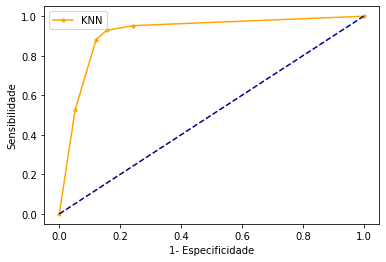

AUC-ROC : 0.883415435139573


In [78]:
# gráfico da curva roc
pyplot.plot(rfp, rvp, marker='.', label='KNN',color="orange")
pyplot.plot([0, 1], [0, 1], color='darkblue', linestyle='--')

# axis labels
pyplot.xlabel('1- Especificidade')
pyplot.ylabel('Sensibilidade')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()
print("AUC-ROC :",auc)

#### Métricas: Multi-Classes

#### Balanced Accuracy

((Acuracia da Classe A) + (Acuracia da Classe B))/Total de Classes
Balanced Accuracy = 9%

In [1]:
from sklearn.metrics import balanced_accuracy_score
y_true = [0, 1, 0, 0, 1, 0]
y_pred = [0, 1, 0, 0, 0, 1]
balanced_accuracy_score(y_true, y_pred)

0.625

#### Kappa Score

O quanto esse acordo entre dois estimadores é melhor do que jogar uma moeda, ou seja um modelo aleatório. Quanto mais próximo de 1 for o seu valor melhor.  Quanto mais proximo de zero pior, pois demonstra uma ausencia de concordancia entre os estimadores, ou seja a concordancia é puramente aleatória.

Medir o Nível de Acordo entre 2 Avaliadores

Kappa Score = (Nivel de Acordo - (Nivel de Acordo ao Acaso)) / 1-(Nivel de Acordo ao Acaso)

In [6]:
from sklearn.metrics import confusion_matrix, cohen_kappa_score

confusion_matrix(y_true, y_pred)


array([[3, 1],
       [1, 1]], dtype=int64)

In [5]:
cohen_kappa_score(y_true, y_pred)

0.25